In [365]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr
/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [366]:
train_dataset_ = pd.read_feather('../input/amexfeather/train_data.ftr')
# Keep the latest statement features for each customer
train_dataset = train_dataset_.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

The dataset of this competition has a huge size. If you're reading raw CSV files, It will create a out of memory error. That's why we read the data from AMEX-Feather-Dataset.

In [367]:
del train_dataset_
gc.collect()

143928

In [368]:
train_dataset.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,NaN,...,NaN,NaN,0.007187,0.004234,0.005085,NaN,0.005810,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,NaN,...,NaN,NaN,0.002981,0.007481,0.007874,NaN,0.003284,0.003170,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,NaN,...,NaN,NaN,0.007381,0.006622,0.000965,NaN,0.002201,0.000834,0.003445,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,NaN,...,NaN,NaN,0.002705,0.006184,0.001899,NaN,0.008186,0.005558,0.002983,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,NaN,...,NaN,NaN,0.002974,0.004162,0.005764,NaN,0.008156,0.006943,0.000905,0


In [369]:
train_dataset.info(max_cols=191,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Data columns (total 190 columns):
 #    Column  Non-Null Count   Dtype         
---   ------  --------------   -----         
 0    S_2     458913 non-null  datetime64[ns]
 1    P_2     455944 non-null  float16       
 2    D_39    458913 non-null  float16       
 3    B_1     458913 non-null  float16       
 4    B_2     458882 non-null  float16       
 5    R_1     458913 non-null  float16       
 6    S_3     373943 non-null  float16       
 7    D_41    458882 non-null  float16       
 8    B_3     458882 non-null  float16       
 9    D_42    59910 non-null   float16       
 10   D_43    324591 non-null  float16       
 11   D_44    436618 non-null  float16       
 12   B_4     458913 non-null  float16       
 13   D_45    458882 non-null  float16       
 14   B_5     458913 non-null  float

# Explore a Pattern

The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

* D_* = Delinquency variables (bad or criminal behaviour, especially among young people)
* S_* = Spend variables
* P_* = Payment variables
* B_* = Balance variables
* R_* = Risk variables

with the following features being categorical: ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [370]:
categorical_cols = train_dataset.select_dtypes(['category']).columns.tolist()
# print(c)
# categorical_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

num_cols = [col for col in train_dataset.columns if col not in categorical_cols + ["target"]]

print(f'Total number of features: {len(num_cols)+len(categorical_cols)}')
print(f'Total number of categorical features: {len(categorical_cols)}')
print(f'Total number of continuos features: {len(num_cols)}')

Total number of features: 189
Total number of categorical features: 11
Total number of continuos features: 178


convert column to float64/float32, because no hardware support for float16 on a typical processor.

In [371]:
float_cols = [col for col in num_cols if col not in ["S_2"]]
train_dataset[float_cols] = train_dataset[float_cols].astype('float64')

In [372]:
train_dataset.info(max_cols=191,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Data columns (total 190 columns):
 #    Column  Non-Null Count   Dtype         
---   ------  --------------   -----         
 0    S_2     458913 non-null  datetime64[ns]
 1    P_2     455944 non-null  float64       
 2    D_39    458913 non-null  float64       
 3    B_1     458913 non-null  float64       
 4    B_2     458882 non-null  float64       
 5    R_1     458913 non-null  float64       
 6    S_3     373943 non-null  float64       
 7    D_41    458882 non-null  float64       
 8    B_3     458882 non-null  float64       
 9    D_42    59910 non-null   float64       
 10   D_43    324591 non-null  float64       
 11   D_44    436618 non-null  float64       
 12   B_4     458913 non-null  float64       
 13   D_45    458882 non-null  float64       
 14   B_5     458913 non-null  float

In [373]:
train_dataset.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,455944.000000,4.589130e+05,458913.000000,4.588820e+05,4.589130e+05,373943.000000,4.588820e+05,4.588820e+05,59910.000000,324591.000000,...,1.639500e+04,1.639500e+04,456083.000000,458913.000000,4.560830e+05,80315.000000,456083.000000,458913.000000,456083.000000,458913.000000
mean,0.635249,2.014894e-01,0.139027,5.916118e-01,1.073955e-01,0.229064,9.948790e-02,1.548289e-01,0.177988,0.163768,...,1.414993e-02,1.590164e-01,0.181102,0.028931,1.665784e-01,0.394762,0.180995,0.052016,0.063796,0.258934
std,0.267547,4.021555e-01,0.231267,4.121448e-01,2.786378e-01,0.198846,3.040704e-01,2.550609e-01,0.253632,0.227060,...,9.529632e-02,2.610801e-01,0.380909,0.152881,3.501719e-01,0.241254,0.380830,0.182032,0.197093,0.438050
min,-0.458984,5.960464e-08,-3.570312,1.788139e-07,5.960464e-08,-0.508789,5.960464e-08,5.960464e-08,-0.000240,0.000002,...,3.576279e-07,1.788139e-07,0.000000,0.000000,1.192093e-07,-0.011436,0.000000,0.000000,0.000000,0.000000
25%,0.449219,4.783630e-03,0.008987,7.092285e-02,2.956390e-03,0.127563,3.007889e-03,5.485535e-03,0.031769,0.043335,...,2.519608e-03,3.482819e-03,0.003046,0.002552,3.026962e-03,0.200684,0.003033,0.002758,0.003031,0.000000
50%,0.682617,9.559631e-03,0.033234,8.134766e-01,5.920410e-03,0.164917,6.011963e-03,1.082993e-02,0.108276,0.092407,...,5.050659e-03,7.026672e-03,0.006077,0.005119,6.050110e-03,0.385986,0.006065,0.005501,0.006073,0.000000
75%,0.862305,2.666016e-01,0.153687,1.001953e+00,8.888245e-03,0.264893,8.995056e-03,2.106934e-01,0.230347,0.195068,...,7.579803e-03,5.014648e-01,0.009102,0.007675,9.101868e-03,0.573730,0.009094,0.008255,0.009102,1.000000
max,1.009766,5.000000e+00,1.324219,1.009766e+00,2.759766e+00,3.994141,8.992188e+00,1.596680e+00,4.187500,9.187500,...,1.009766e+00,2.505859e+00,1.009766,1.009766,1.339844e+00,2.228516,1.009766,1.343750,4.828125,1.000000


# Target visualization

<AxesSubplot:xlabel='target', ylabel='count'>

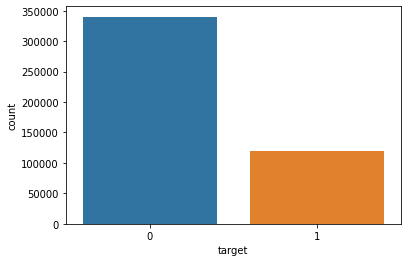

In [374]:
sns.countplot(x = 'target', data = train_dataset)

# Categorial features visualization

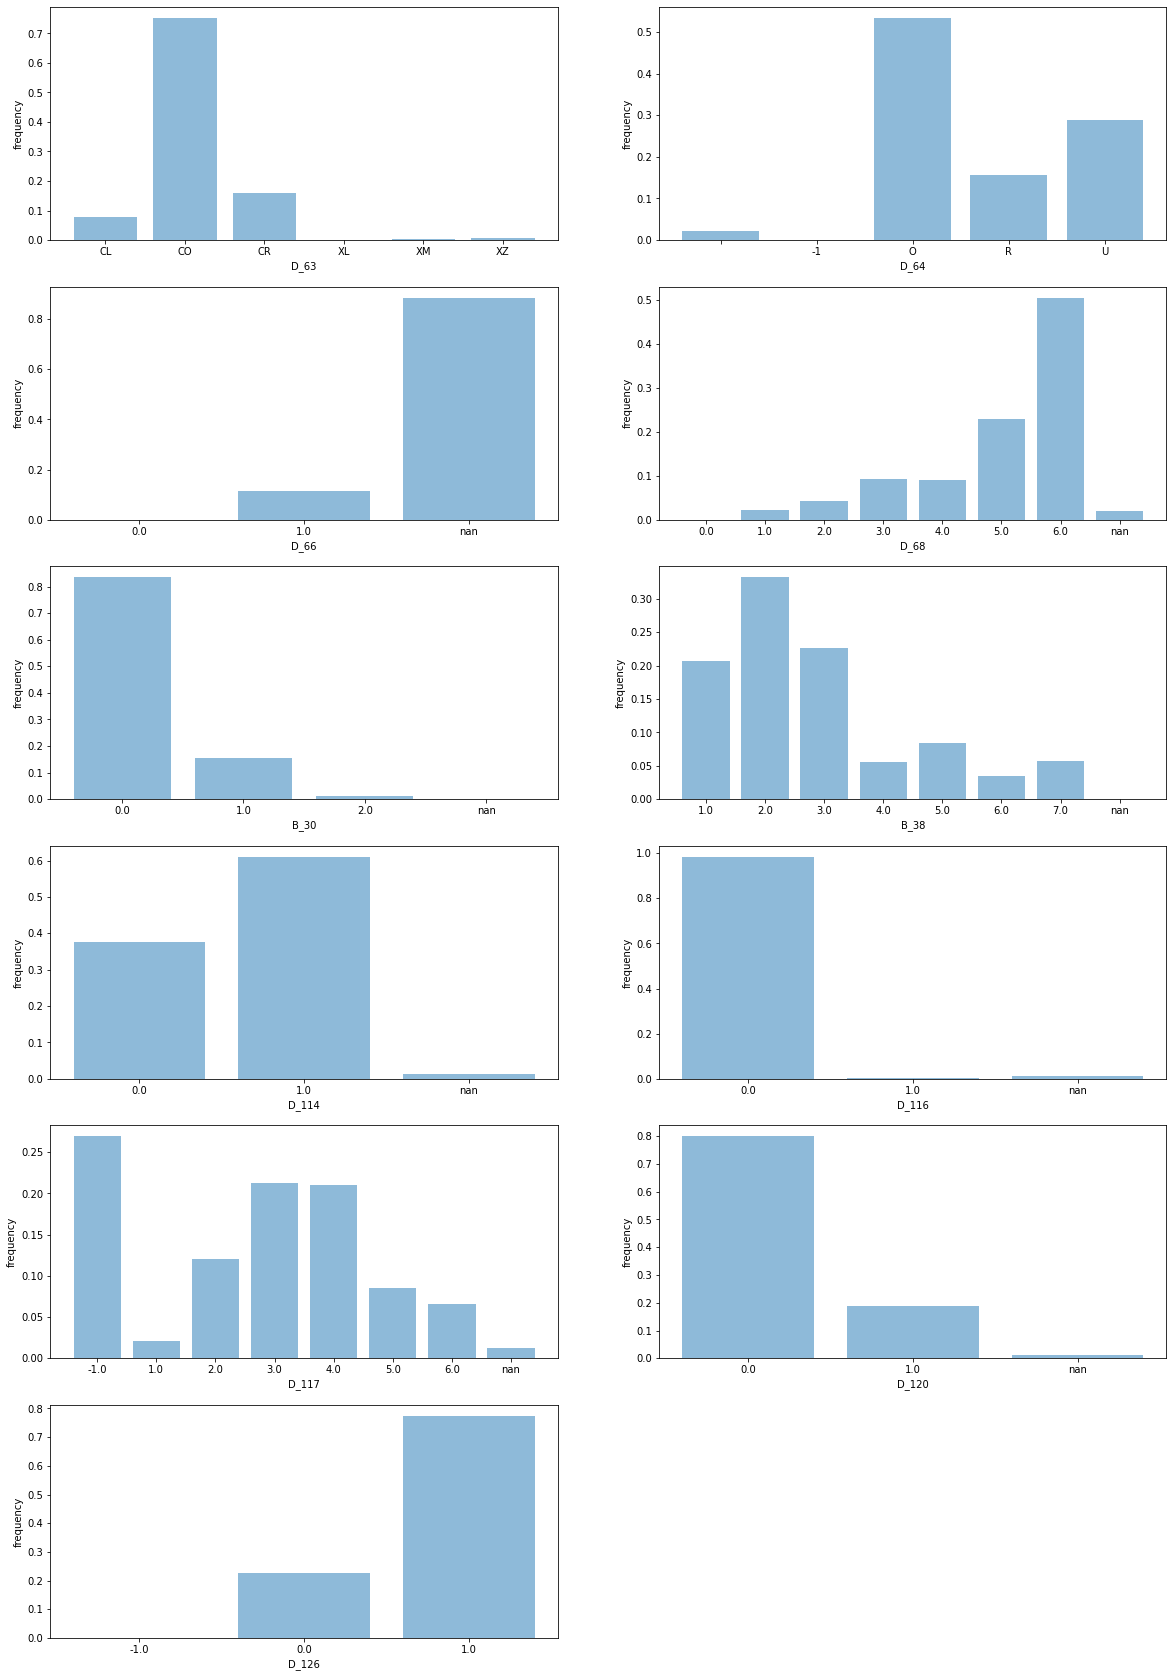

In [375]:
plt.figure(figsize=(20, 30))
for i, k in enumerate(categorical_cols):
    plt.subplot(6, 2, i+1)
    temp_val = pd.DataFrame(train_dataset[k].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp_val.index.name = 'value'
    temp_val.reset_index(inplace=True)
    plt.bar(temp_val.index, temp_val['count'], alpha=0.5)
    plt.xlabel(k)
    plt.ylabel('frequency')
    plt.xticks(temp_val.index, temp_val.value)
plt.show()

# Visualizing categorial features based on the target

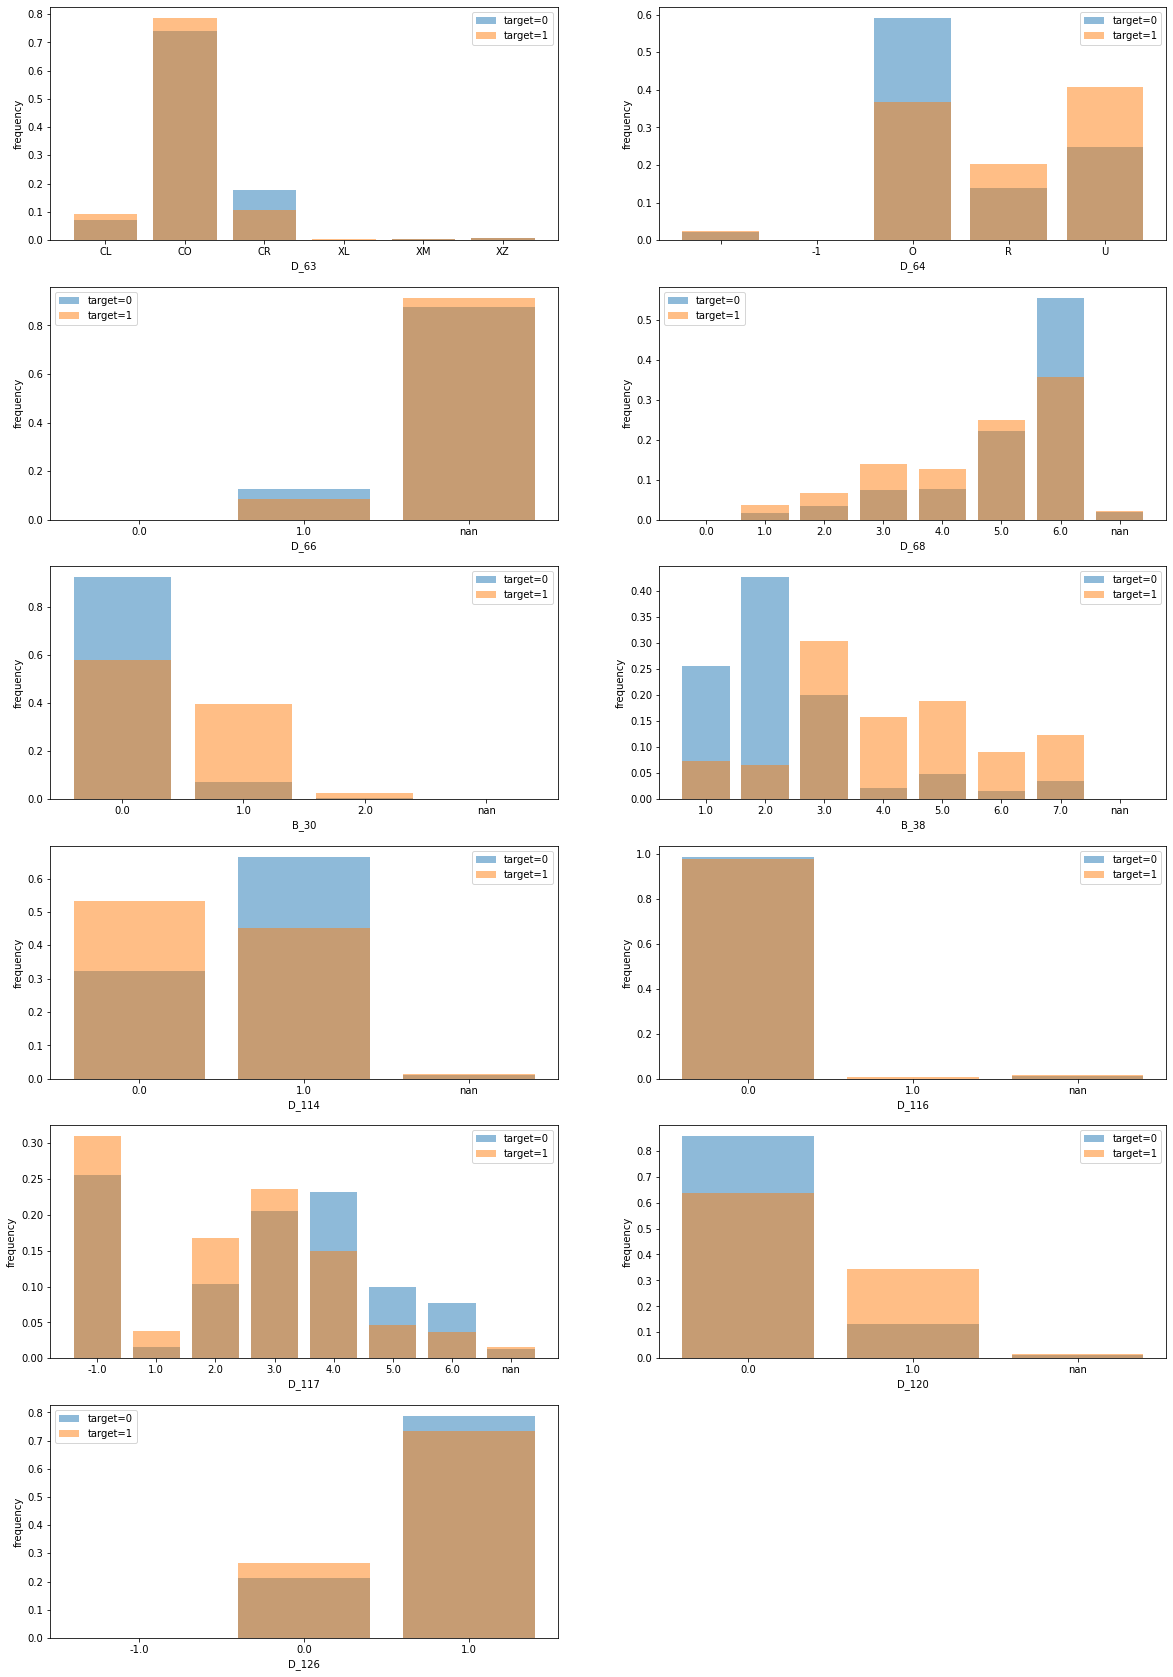

In [376]:
plt.figure(figsize=(20, 30))
for i, f in enumerate(categorical_cols):
    plt.subplot(6, 2, i+1)
    temp = pd.DataFrame(train_dataset[f][train_dataset.target == 0].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
    temp = pd.DataFrame(train_dataset[f][train_dataset.target == 1].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
    plt.xlabel(f)
    plt.ylabel('frequency')
    plt.legend()
    plt.xticks(temp.index, temp.value)
plt.show()

# Visualizing continuous features

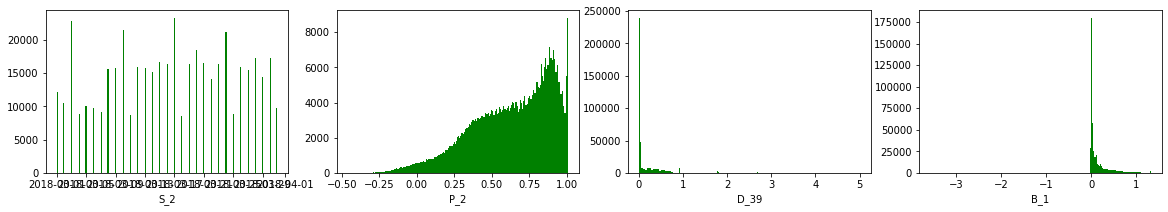

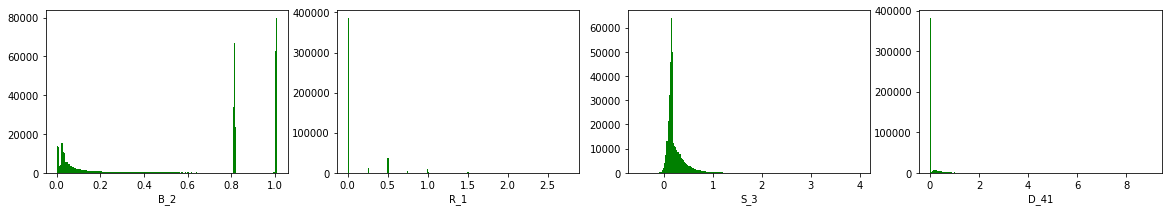

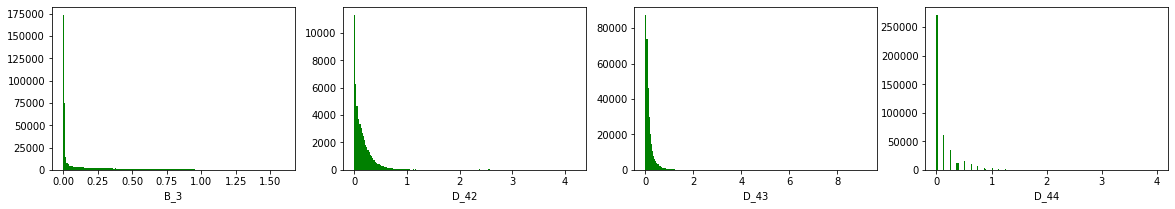

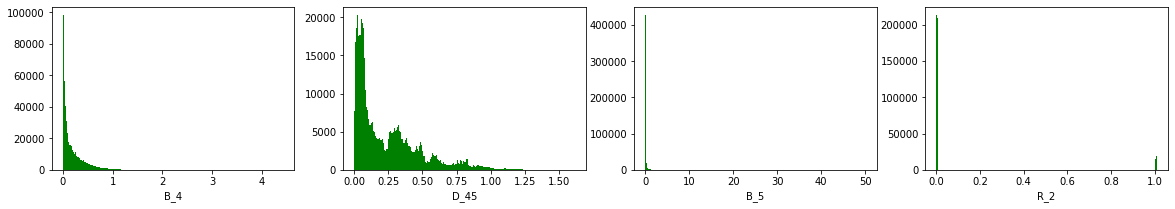

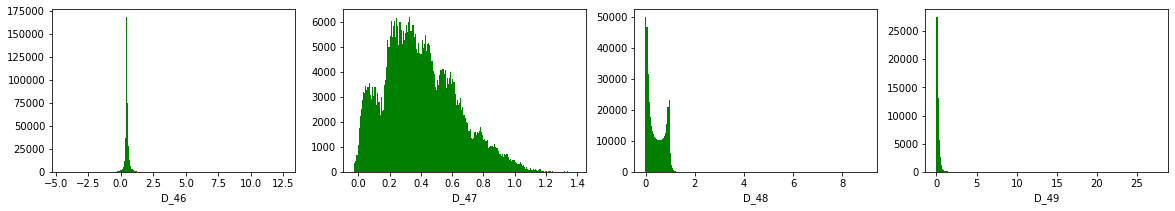

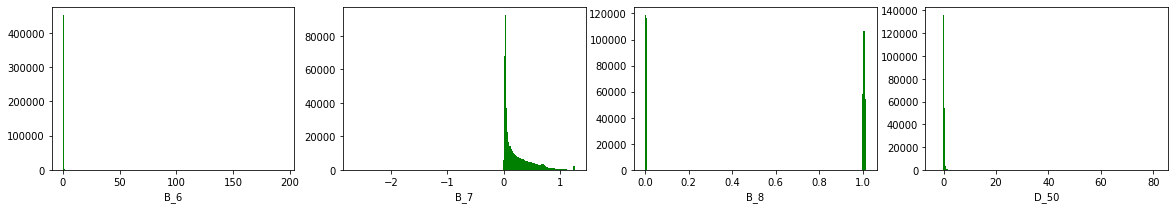

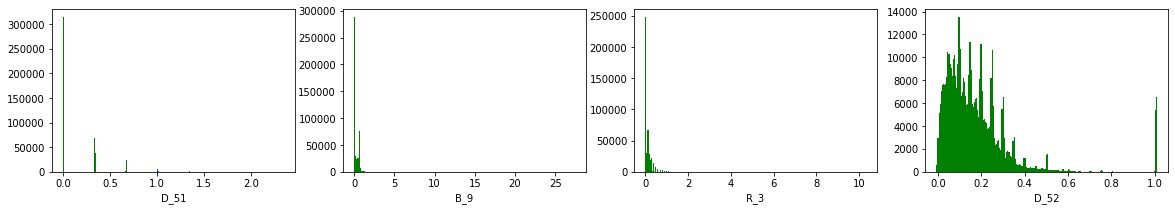

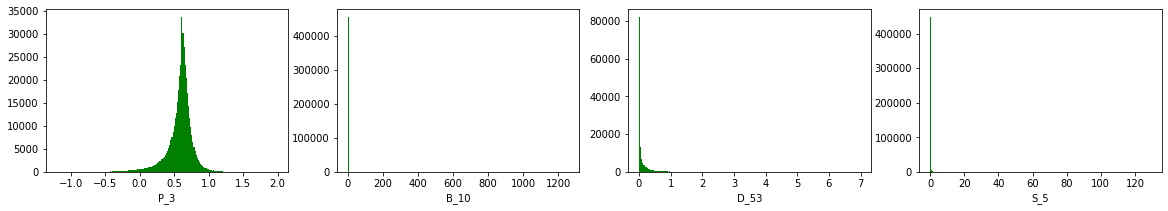

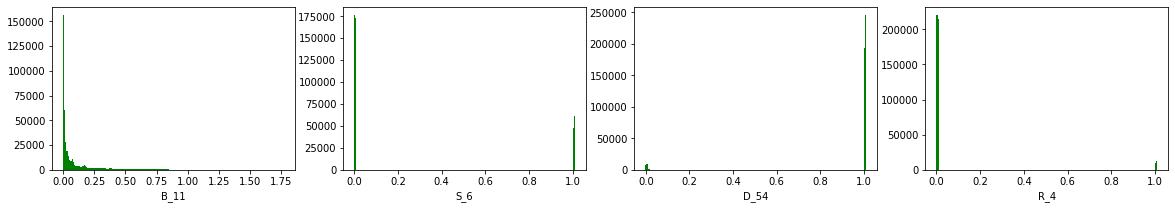

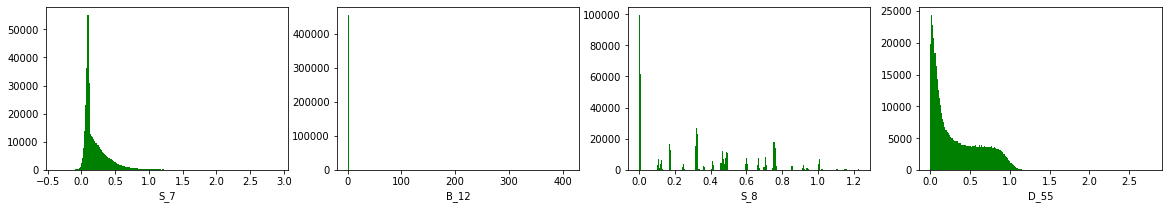

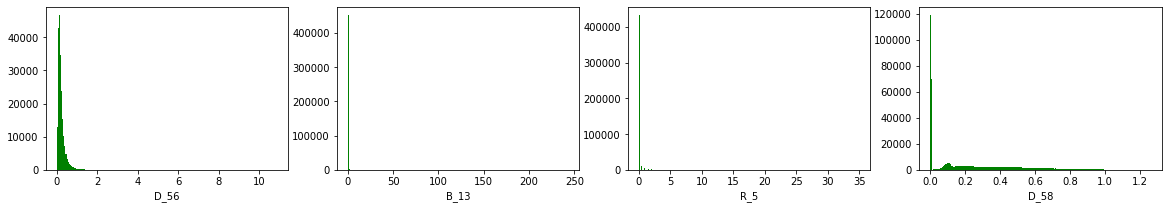

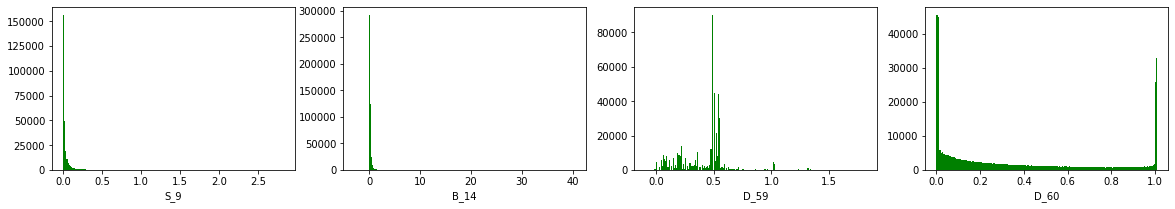

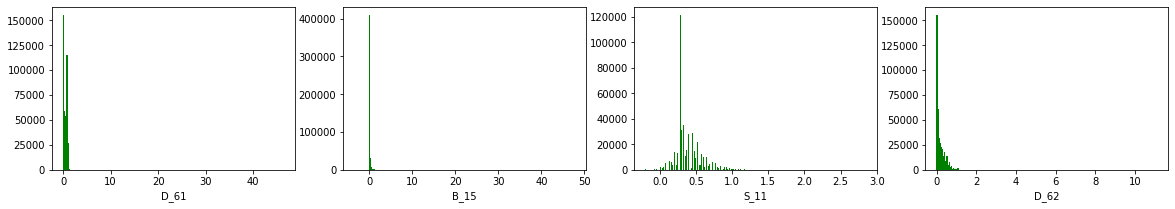

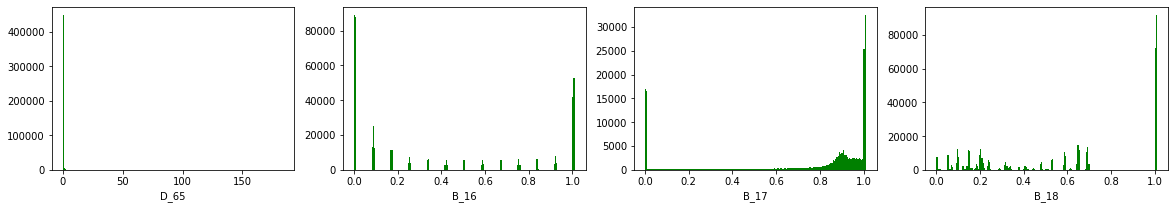

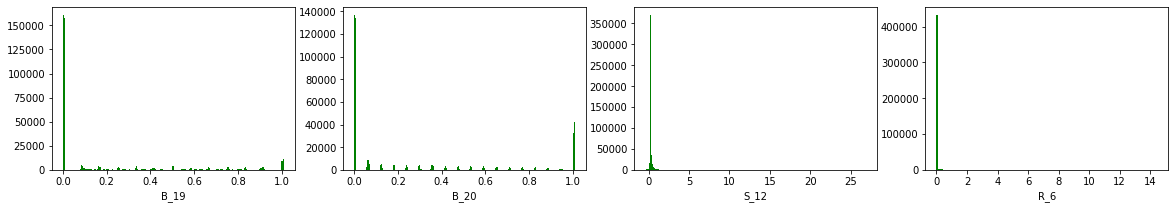

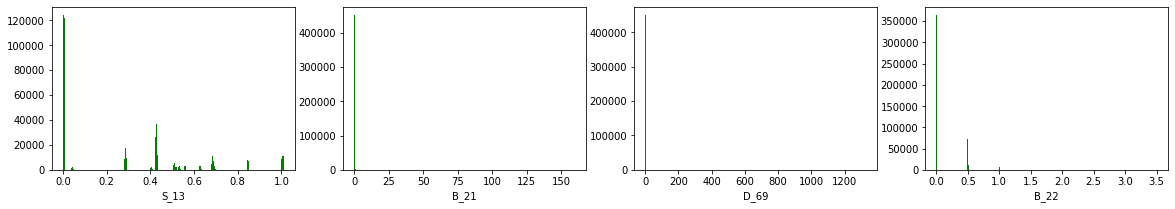

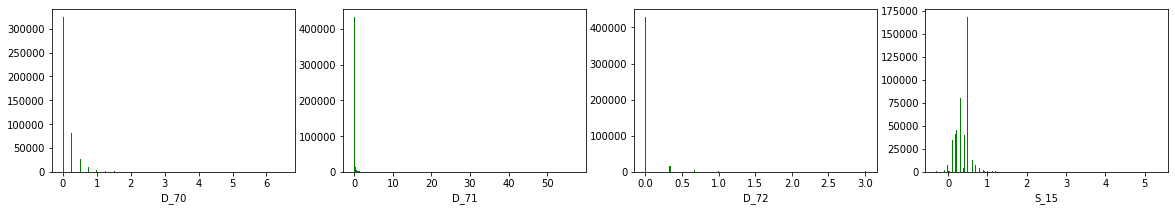

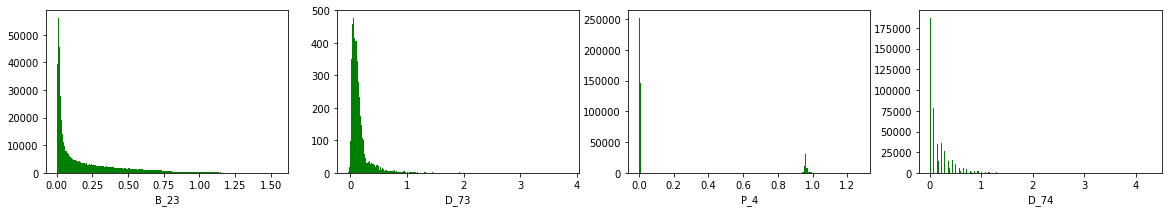

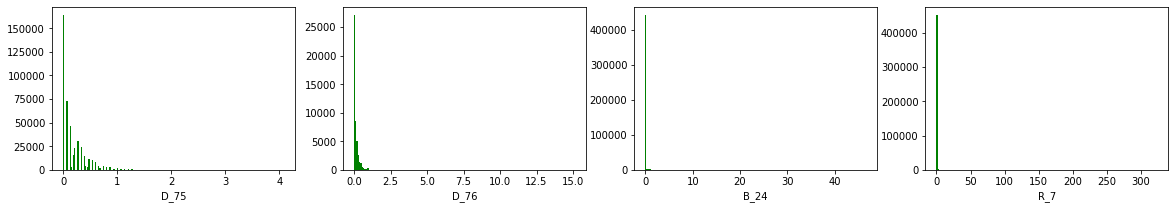

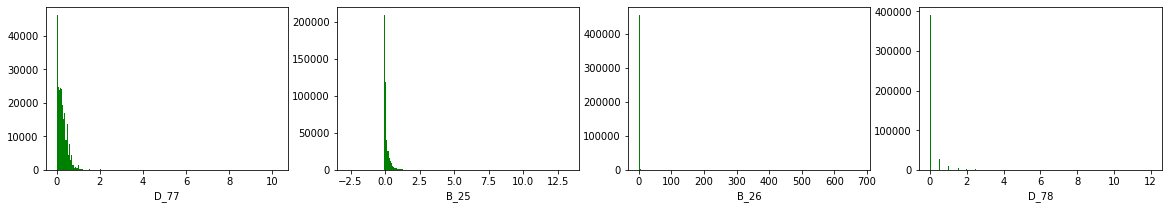

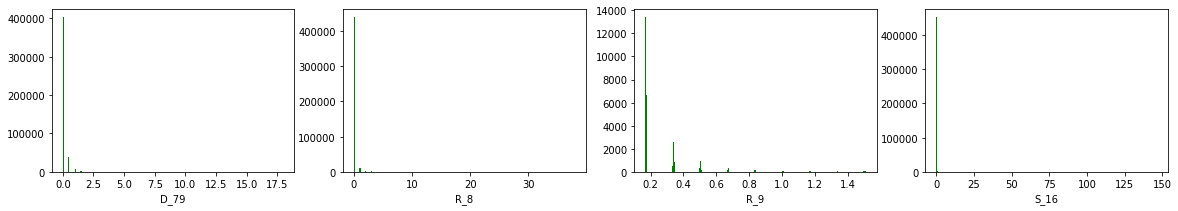

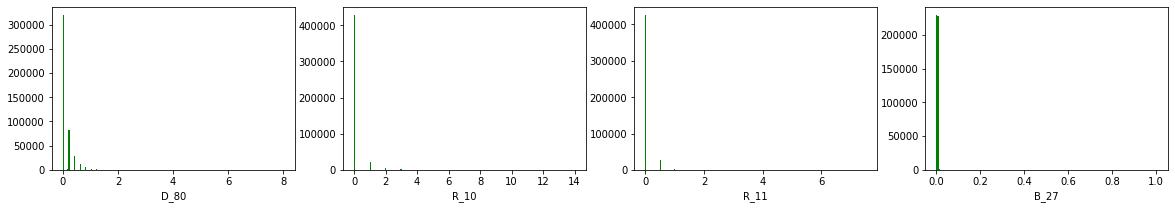

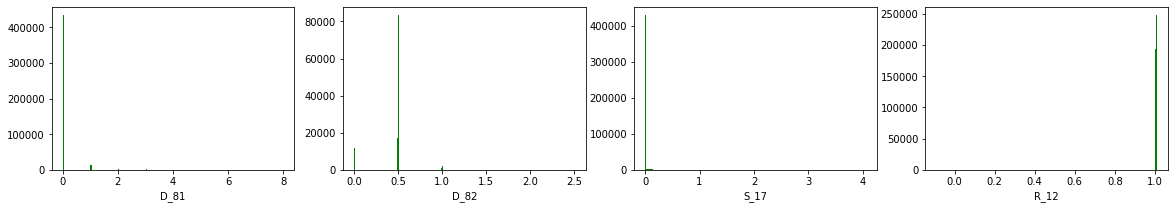

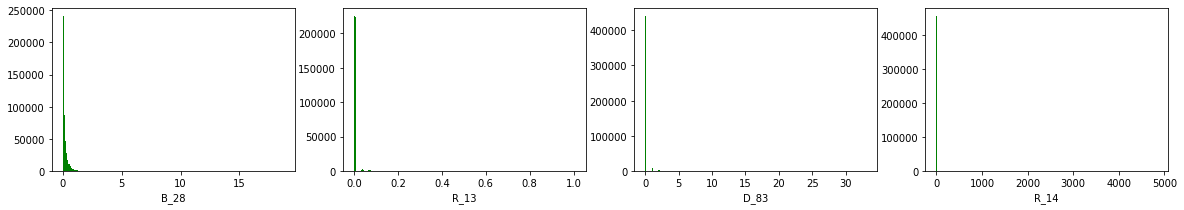

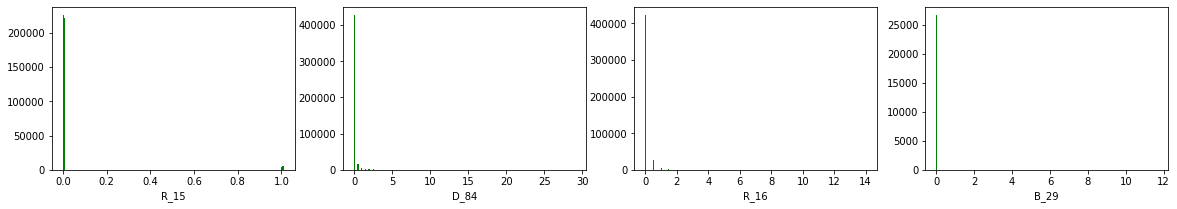

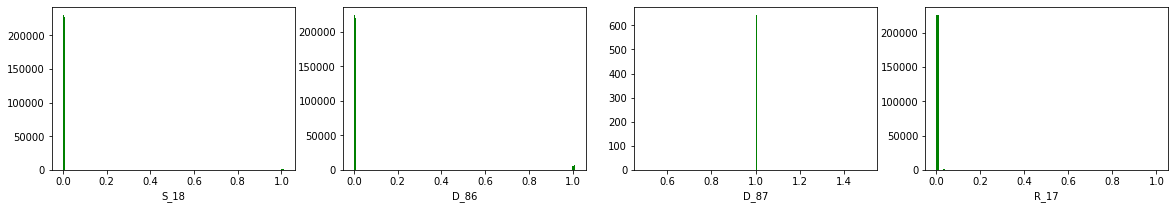

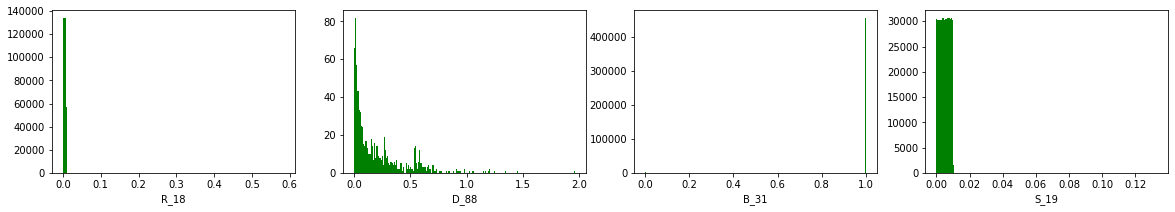

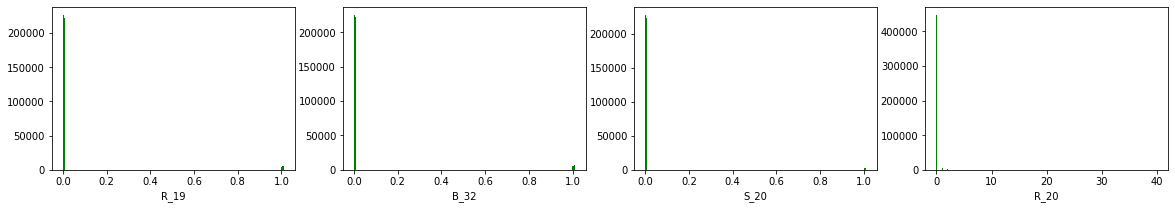

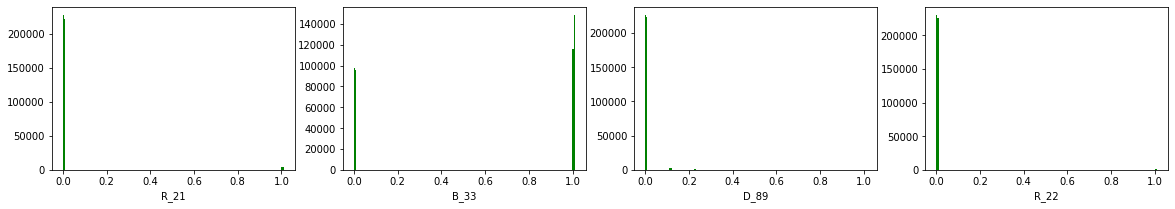

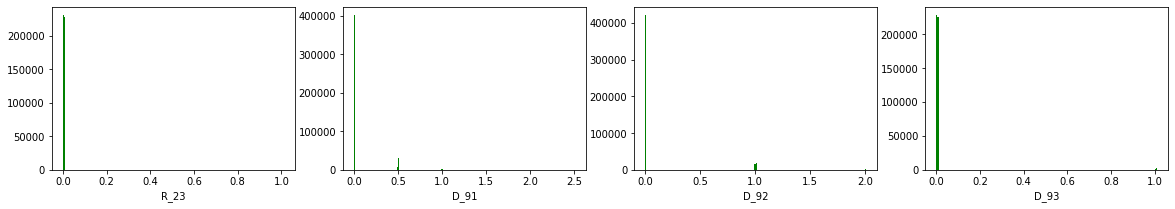

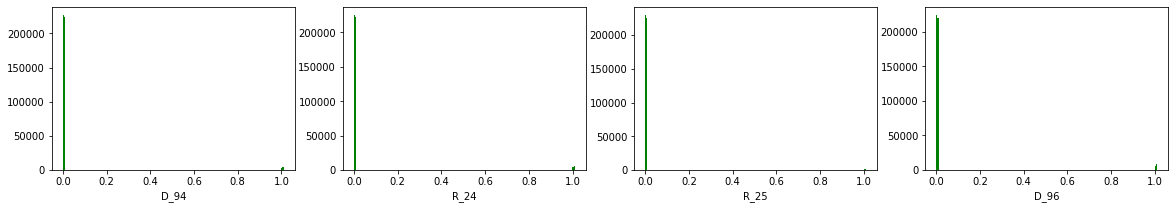

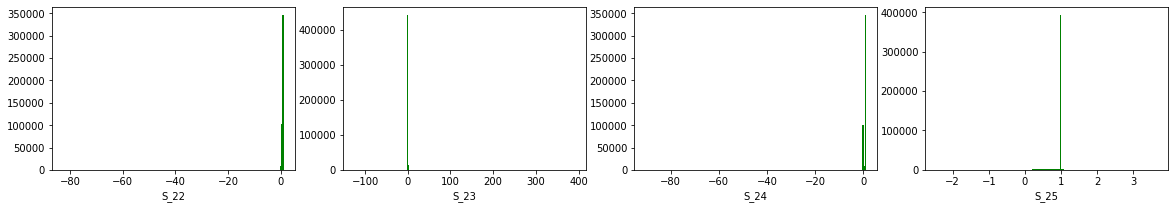

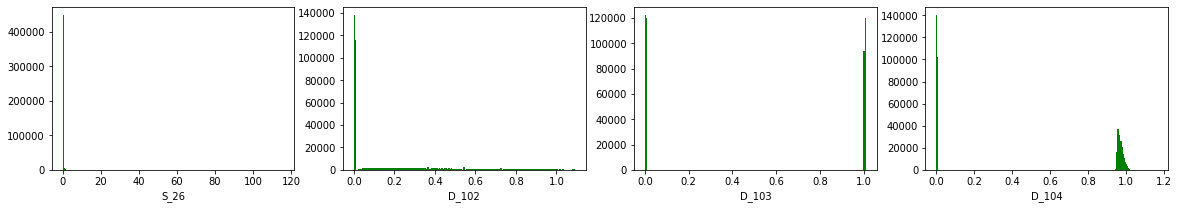

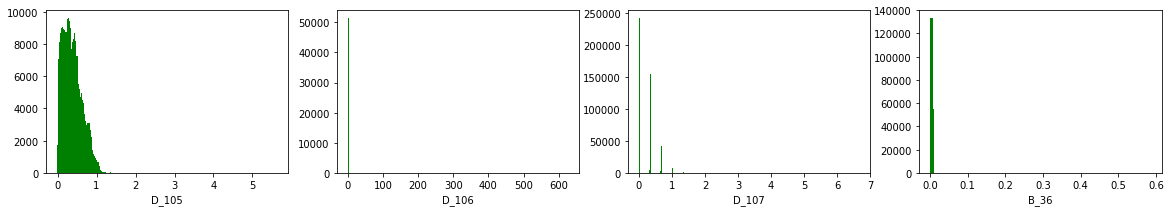

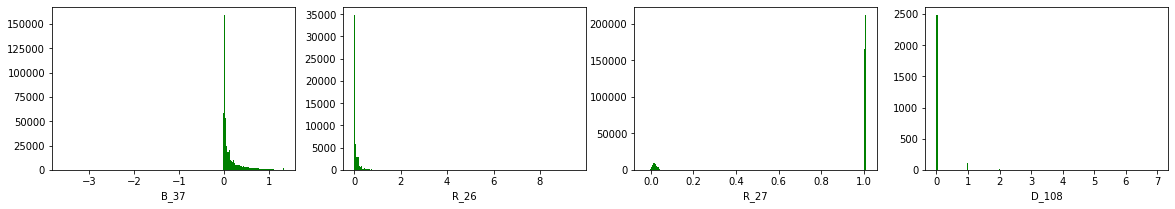

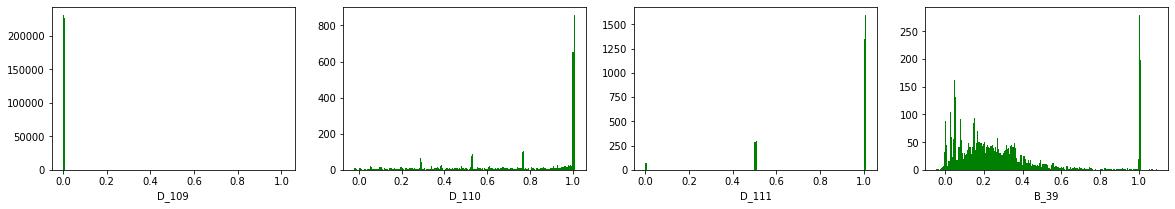

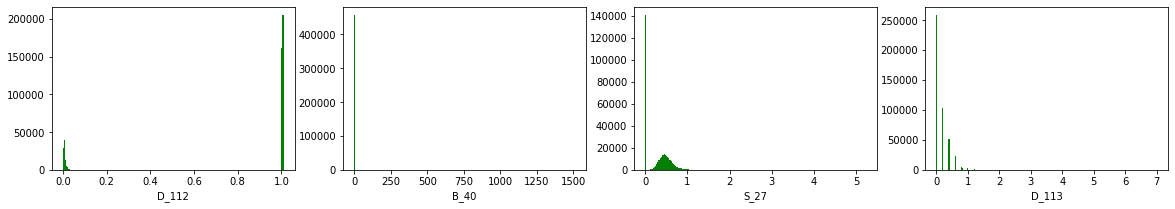

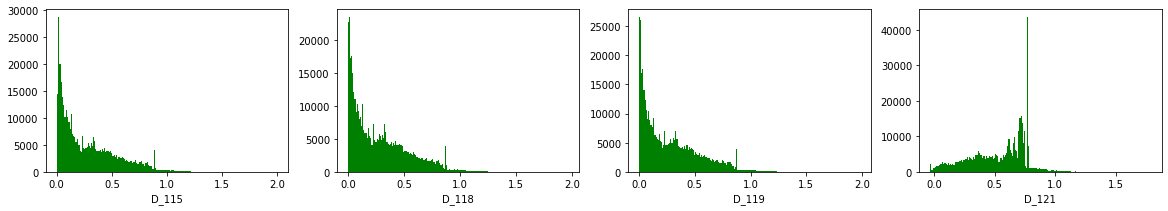

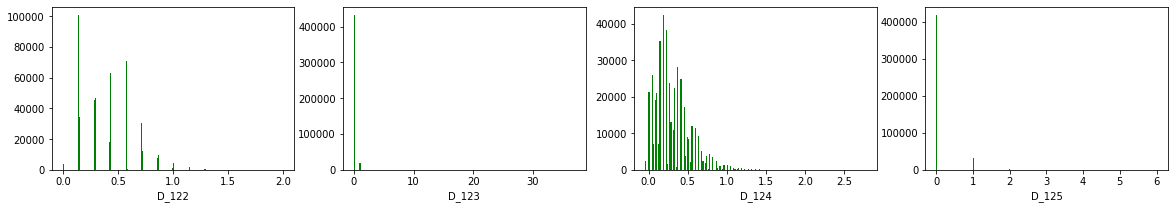

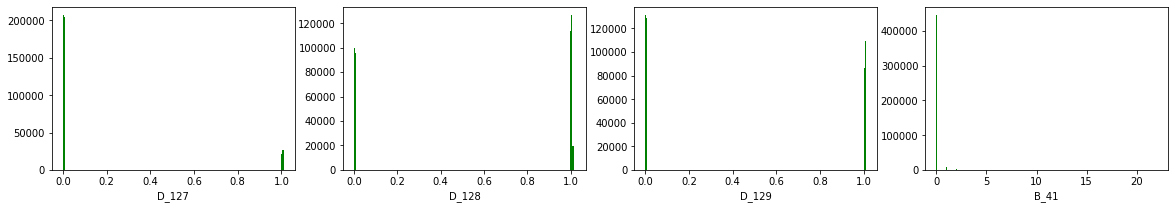

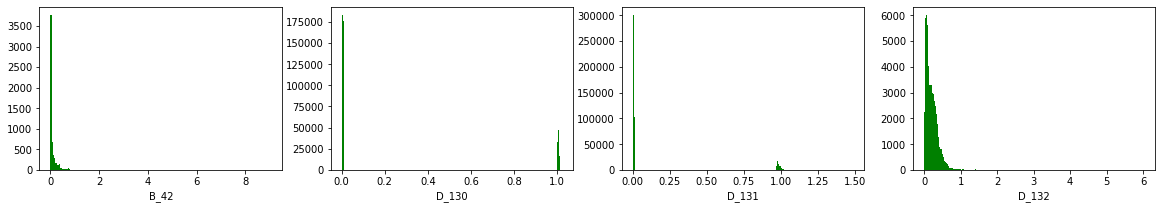

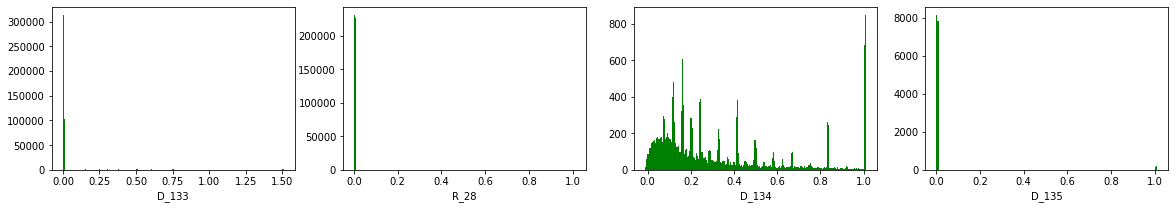

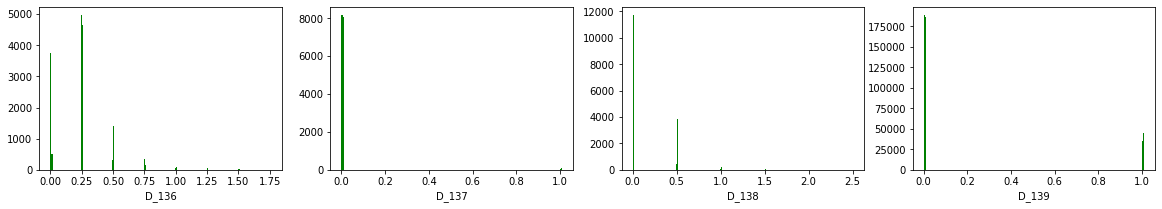

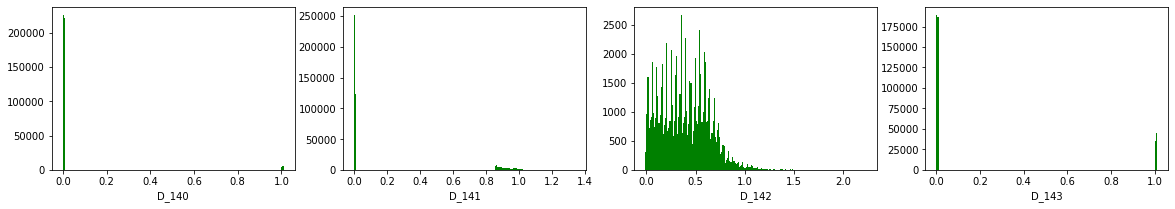

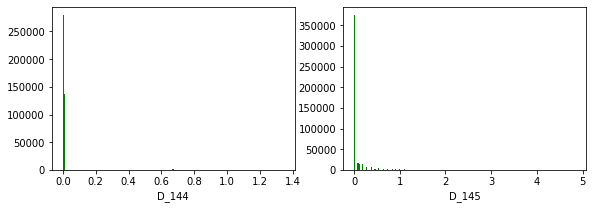

In [377]:
for i, l in enumerate(num_cols):
    if i % 4 == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(20, 3))
    plt.subplot(1, 4, i % 4 + 1)
    plt.hist(train_dataset[l], bins=200, color='#008000')
    plt.xlabel(l)
plt.show()

# Aggregated profile features

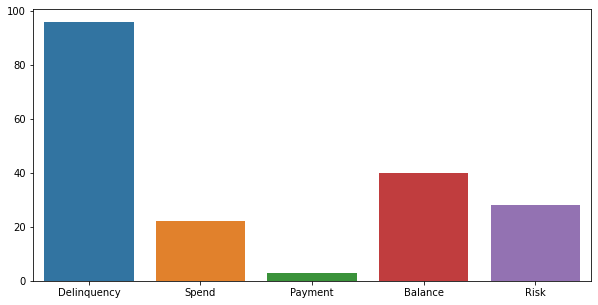

In [378]:
Delinquency = [d for d in train_dataset.columns if d.startswith('D_')]
Spend = [s for s in train_dataset.columns if s.startswith('S_')]
Payment = [p for p in train_dataset.columns if p.startswith('P_')]
Balance = [b for b in train_dataset.columns if b.startswith('B_')]
Risk = [r for r in train_dataset.columns if r.startswith('R_')]
Dict = {'Delinquency': len(Delinquency), 'Spend': len(Spend), 'Payment': len(Payment), 'Balance': len(Balance), 'Risk': len(Risk),}

plt.figure(figsize=(10,5))
sns.barplot(x=list(Dict.keys()), y=list(Dict.values()));

In [379]:
train_dataset["S_2"] = train_dataset["S_2"].astype('datetime64[ns]')
train_dataset["Day of week"] = train_dataset["S_2"].dt.dayofweek
train_dataset["Year"] = train_dataset["S_2"].dt.year
train_dataset["Month"] = train_dataset["S_2"].dt.month
train_dataset["Day"] = train_dataset["S_2"].dt.day

# Check null values

In [380]:
NaN_Val = np.array(train_dataset.isnull().sum())
NaN_prec = np.array((train_dataset.isnull().sum() * 100 / len(train_dataset)).round(2))
NaN_Col = pd.DataFrame([np.array(list(train_dataset.columns)).T,NaN_Val.T,NaN_prec.T,np.array(list(train_dataset.dtypes)).T], index=['Features','Num of Missing values','Percentage','DataType']
).transpose()
pd.set_option('display.max_rows', None)
NaN_Col

,Features,Num of Missing values,Percentage,DataType
0,S_2,0,0.0,datetime64[ns]
1,P_2,2969,0.65,float64
2,D_39,0,0.0,float64
3,B_1,0,0.0,float64
4,B_2,31,0.01,float64
5,R_1,0,0.0,float64
6,S_3,84970,18.52,float64
7,D_41,31,0.01,float64
8,B_3,31,0.01,float64
9,D_42,399003,86.95,float64


There are many missing values in the dataset

# Drop unuseful columns

Remove columns if there are > 80% of missing values

In [381]:
unuseful_columns = NaN_Col[NaN_Col["Percentage"]>=80]["Features"].tolist()
print(type(unuseful_columns))
unuseful_columns

<class 'list'>


['D_42',
 'D_49',
 'D_66',
 'D_73',
 'D_76',
 'R_9',
 'B_29',
 'D_87',
 'D_88',
 'D_106',
 'R_26',
 'D_108',
 'D_110',
 'D_111',
 'B_39',
 'B_42',
 'D_132',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_142']

In [382]:
dropping_columns = unuseful_columns+ ["S_2"]

In [383]:
train_dataset = train_dataset.drop(dropping_columns, axis=1)

# Fill null values

In [384]:
selected_col = np.array(['P_2','S_3','B_2','D_41','D_43','B_3','D_44','D_45','D_46','D_48','D_50','D_53','S_7','D_56','S_9','B_6','B_8','D_52','P_3','D_54','D_55','B_13','D_59','D_61','B_15','D_62','B_16','B_17','D_77','B_19','B_20','D_69','B_22','D_70','D_72','D_74','R_7','B_25','B_26','D_78','D_79','D_80','B_27','D_81','R_12','D_82','D_105','S_27','D_83','R_14','D_84','D_86','R_20','B_33','D_89','D_91','S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_107','B_37','R_27','D_109','D_112','B_40','D_113','D_115','D_118','D_119','D_121','D_122','D_123','D_124','D_125','D_128','D_129','B_41','D_130','D_131','D_133','D_139','D_140','D_141','D_143','D_144','D_145'])

for col in selected_col:
#     train_dataset[col] = train_dataset[col].fillna(train_dataset[col].mean())
    train_dataset[col] = train_dataset[col].fillna(train_dataset[col].median())

In [385]:
selcted_col2 = np.array(['D_68','B_30','B_38','D_64','D_114','D_116','D_117','D_120','D_126'])

for col2 in selcted_col2:
    train_dataset[col2] =  train_dataset[col2].fillna(train_dataset[col2].mode()[0])

# Check again null values

In [386]:
print(train_dataset.isnull().sum().to_string())

P_2            0
D_39           0
B_1            0
B_2            0
R_1            0
S_3            0
D_41           0
B_3            0
D_43           0
D_44           0
B_4            0
D_45           0
B_5            0
R_2            0
D_46           0
D_47           0
D_48           0
B_6            0
B_7            0
B_8            0
D_50           0
D_51           0
B_9            0
R_3            0
D_52           0
P_3            0
B_10           0
D_53           0
S_5            0
B_11           0
S_6            0
D_54           0
R_4            0
S_7            0
B_12           0
S_8            0
D_55           0
D_56           0
B_13           0
R_5            0
D_58           0
S_9            0
B_14           0
D_59           0
D_60           0
D_61           0
B_15           0
S_11           0
D_62           0
D_63           0
D_64           0
D_65           0
B_16           0
B_17           0
B_18           0
B_19           0
B_20           0
D_68           0
S_12          

There are no more missing values

In [387]:
train_dataset.shape

(458913, 170)

In [388]:
train_dataset.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_140,D_141,D_143,D_144,D_145,target,Day of week,Year,Month,Day
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,0.092407,0.003258,...,0.004234,0.005085,0.005810,0.002970,0.008530,0,1,2018,3,13
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,0.060638,0.008781,...,0.007481,0.007874,0.003284,0.003170,0.008514,0,6,2018,3,25
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.880859,0.009705,0.004284,0.812500,0.006451,0.164917,0.003796,0.007195,0.092407,0.000628,...,0.006622,0.000965,0.002201,0.000834,0.003445,0,0,2018,3,12
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,0.046112,0.007793,...,0.006184,0.001899,0.008186,0.005558,0.002983,0,3,2018,3,29
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.872070,0.005573,0.007679,0.815918,0.001247,0.164917,0.000231,0.005527,0.044678,0.002436,...,0.004162,0.005764,0.008156,0.006943,0.000905,0,4,2018,3,30


# Load Testing DataSet

In [389]:
test_dataset_ = pd.read_feather('../input/amexfeather/test_data.ftr')
# Keep the latest statement features for each customer
test_dataset = test_dataset_.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

In [390]:
del test_dataset_
gc.collect()

89650

In [391]:
test_dataset.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,2019-10-12,0.568848,0.121399,0.010780,1.009766,0.006924,0.149414,0.000396,0.003576,0.10376,...,NaN,NaN,NaN,0.005913,0.001250,0.006542,NaN,0.009163,0.003691,0.003220
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,2019-04-15,0.841309,0.126465,0.016556,1.008789,0.009712,0.112183,0.006191,0.011383,NaN,...,NaN,NaN,NaN,0.004345,0.000866,0.009117,NaN,0.002197,0.000247,0.007778
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,2019-10-16,0.697754,0.002724,0.001485,0.810059,0.002621,0.166138,0.004887,0.015945,NaN,...,NaN,NaN,NaN,1.000977,0.008896,0.895996,0.150146,1.009766,0.457764,0.092041
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,2019-04-22,0.513184,0.324707,0.149536,0.205688,0.002277,0.181152,0.005814,0.498535,NaN,...,NaN,NaN,NaN,1.007812,0.003754,0.919922,0.255371,1.007812,0.500977,0.182983
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,2019-10-22,0.254395,0.768066,0.563477,0.038025,0.502930,0.168335,0.009483,0.831055,NaN,...,NaN,NaN,NaN,0.006622,0.001140,0.009529,NaN,0.009407,0.001557,0.000525


In [392]:
test_dataset.shape

(924621, 189)

# Check null values

In [393]:
float_cols2 = [col for col in num_cols if col not in ["S_2"]]
test_dataset[float_cols2] = test_dataset[float_cols2].astype('float64')

In [394]:
NaN_Val2 = np.array(test_dataset.isnull().sum())
NaN_prec2 = np.array((test_dataset.isnull().sum() * 100 / len(test_dataset)).round(2))
NaN_Col2 = pd.DataFrame([np.array(list(test_dataset.columns)).T,NaN_Val2.T,NaN_prec2.T,np.array(list(test_dataset.dtypes)).T], index=['Features','Num of Missing values','Percentage','DataType']
).transpose()
pd.set_option('display.max_rows', None)

NaN_Col2

,Features,Num of Missing values,Percentage,DataType
0,S_2,0,0.0,datetime64[ns]
1,P_2,4784,0.52,float64
2,D_39,0,0.0,float64
3,B_1,0,0.0,float64
4,B_2,43,0.0,float64
5,R_1,0,0.0,float64
6,S_3,144280,15.6,float64
7,D_41,43,0.0,float64
8,B_3,43,0.0,float64
9,D_42,827578,89.5,float64


In [395]:
test_dataset["S_2"] = test_dataset["S_2"].astype('datetime64[ns]')
test_dataset["Day of week"] = test_dataset["S_2"].dt.dayofweek
test_dataset["Year"] = test_dataset["S_2"].dt.year
test_dataset["Month"] = test_dataset["S_2"].dt.month
test_dataset["Day"] = test_dataset["S_2"].dt.day

# Drop unuseful columns

In [396]:
unuseful_columns2 = NaN_Col2[NaN_Col2["Percentage"]>=80]["Features"].tolist()
print(type(unuseful_columns2))
unuseful_columns2

<class 'list'>


['D_42',
 'D_49',
 'D_66',
 'D_73',
 'D_76',
 'R_9',
 'D_87',
 'D_88',
 'D_106',
 'R_26',
 'D_108',
 'D_110',
 'D_111',
 'B_39',
 'B_42',
 'D_132',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_142']

In [397]:
dropping_columns

['D_42',
 'D_49',
 'D_66',
 'D_73',
 'D_76',
 'R_9',
 'B_29',
 'D_87',
 'D_88',
 'D_106',
 'R_26',
 'D_108',
 'D_110',
 'D_111',
 'B_39',
 'B_42',
 'D_132',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_142',
 'S_2']

In [398]:
# except B_29, test set has similer high null precentage columns, since we remove B_29 from training set, that column removed from test set also.
test_dataset = test_dataset.drop(dropping_columns, axis=1)

# Fill null values

In [399]:
selected_column = np.array(['P_2','S_3','B_2','D_41','D_43','B_3','D_44','D_45','D_46','D_48','D_50','D_53','S_7','D_56','S_9','S_12','S_17','B_6','B_8','D_52','P_3','D_54','D_55','B_13','D_59','D_61','B_15','D_62','B_16','B_17','D_77','B_19','B_20','D_69','B_22','D_70','D_72','D_74','R_7','B_25','B_26','D_78','D_79','D_80','B_27','D_81','R_12','D_82','D_105','S_27','D_83','R_14','D_84','D_86','R_20','B_33','D_89','D_91','S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_107','B_37','R_27','D_109','D_112','B_40','D_113','D_115','D_118','D_119','D_121','D_122','D_123','D_124','D_125','D_128','D_129','B_41','D_130','D_131','D_133','D_139','D_140','D_141','D_143','D_144','D_145'])

for column in selected_column:
    test_dataset[column] = test_dataset[column].fillna(test_dataset[column].mean())

In [400]:
selected_column2 = np.array(['D_68','B_30','B_38','D_114','D_116','D_117','D_120','D_126'])

for column2 in selected_column2:
    test_dataset[column2] =  test_dataset[column2].fillna(test_dataset[column2].mode()[0])

# Check again null values

In [401]:
print(test_dataset.isnull().sum().to_string())

P_2            0
D_39           0
B_1            0
B_2            0
R_1            0
S_3            0
D_41           0
B_3            0
D_43           0
D_44           0
B_4            0
D_45           0
B_5            0
R_2            0
D_46           0
D_47           0
D_48           0
B_6            0
B_7            0
B_8            0
D_50           0
D_51           0
B_9            0
R_3            0
D_52           0
P_3            0
B_10           0
D_53           0
S_5            0
B_11           0
S_6            0
D_54           0
R_4            0
S_7            0
B_12           0
S_8            0
D_55           0
D_56           0
B_13           0
R_5            0
D_58           0
S_9            0
B_14           0
D_59           0
D_60           0
D_61           0
B_15           0
S_11           0
D_62           0
D_63           0
D_64           0
D_65           0
B_16           0
B_17           0
B_18           0
B_19           0
B_20           0
D_68           0
S_12          

In [402]:
test_dataset.shape

(924621, 169)

In [403]:
test_dataset.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_139,D_140,D_141,D_143,D_144,D_145,Day of week,Year,Month,Day
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.568848,0.121399,0.010780,1.009766,0.006924,0.149414,0.000396,0.003576,0.007397,0.006786,...,0.005913,0.001250,0.006542,0.009163,0.003691,0.003220,5,2019,10,12
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.841309,0.126465,0.016556,1.008789,0.009712,0.112183,0.006191,0.011383,0.164212,0.004234,...,0.004345,0.000866,0.009117,0.002197,0.000247,0.007778,0,2019,4,15
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,0.697754,0.002724,0.001485,0.810059,0.002621,0.166138,0.004887,0.015945,0.105286,0.003382,...,1.000977,0.008896,0.895996,1.009766,0.457764,0.092041,2,2019,10,16
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,0.513184,0.324707,0.149536,0.205688,0.002277,0.181152,0.005814,0.498535,0.211670,0.258545,...,1.007812,0.003754,0.919922,1.007812,0.500977,0.182983,0,2019,4,22
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,0.254395,0.768066,0.563477,0.038025,0.502930,0.168335,0.009483,0.831055,0.071899,0.375732,...,0.006622,0.001140,0.009529,0.009407,0.001557,0.000525,1,2019,10,22


# Convert categorical variable to numericals

In [404]:
train_dataset[['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68']].head()

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_68
customer_ID,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,6.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.0,2.0,1.0,0.0,-1.0,0.0,1.0,CO,O,6.0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.0,1.0,1.0,0.0,-1.0,0.0,1.0,CO,R,6.0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.0,2.0,1.0,0.0,6.0,0.0,1.0,CO,O,3.0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.0,1.0,1.0,0.0,4.0,0.0,1.0,CO,O,6.0


In [405]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
categorical_cols.remove('D_66') # D_66 is a dropped column

train_dataset[categorical_cols] = enc.fit_transform(train_dataset[categorical_cols])
test_dataset[categorical_cols] = enc.transform(test_dataset[categorical_cols])

# Remove highly correlated features

Remove columns if there are > 90% of correlations

In [406]:
train_dataset_without_target = train_dataset.drop(["target"],axis=1)

cor_matrix = train_dataset_without_target.corr()
col_core = set()

for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if(cor_matrix.iloc[i, j] > 0.9):
            col_name = cor_matrix.columns[i]
            col_core.add(col_name)
col_core

{'B_11',
 'B_13',
 'B_15',
 'B_23',
 'B_33',
 'B_37',
 'D_104',
 'D_119',
 'D_141',
 'D_143',
 'D_74',
 'D_75',
 'D_77',
 'S_24',
 'S_7'}

In [407]:
# train_dataset = train_dataset.drop(col_core, axis=1)
# test_dataset = test_dataset.drop(col_core, axis=1)

In [408]:
train_dataset.shape

(458913, 170)

In [409]:
test_dataset.shape

(924621, 169)

# Train Model

In [410]:
feature_columns = [col for col in train_dataset.columns if col not in ["target"]]

X = train_dataset[feature_columns]
y = train_dataset['target']

print(f"X shape is = {X.shape}" )
print(f"Y shape is = {y.shape}" )

X shape is = (458913, 169)
Y shape is = (458913,)


In [411]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape is = {x_train.shape}" )
print(f"Y_train shape is = {y_train.shape}" )
print(f"X_test shape is = {x_test.shape}" )
print(f"Y_test shape is = {y_test.shape}" )

X_train shape is = (367130, 169)
Y_train shape is = (367130,)
X_test shape is = (91783, 169)
Y_test shape is = (91783,)


# **lightgbm method**

In [412]:
import lightgbm as lgb

d_train = lgb.Dataset(x_train, label=y_train, categorical_feature = categorical_cols)

params = {'objective': 'binary','n_estimators': 1250,'metric': 'binary_logloss','boosting': 'gbdt','num_leaves': 90,'reg_lambda' : 50,'colsample_bytree': 0.19,'learning_rate': 0.03,'min_child_samples': 2400,'max_bins': 511,'seed': 42,'verbose': -1}

# trained model with 100 iterations
model = lgb.train(params, d_train, 100)


# ============================================

# import lightgbm as lgb
# model = lgb.LGBMClassifier()
# model.fit(x_train, y_train)

# **LogisticRegression**

In [413]:
# from sklearn.linear_model import LogisticRegression
# logisticRegr = LogisticRegression()
# logisticRegr.fit(x_train, y_train)
# model = logisticRegr

# **SVM method**

In [414]:
# from sklearn import svm
# model = svm.SVC(kernel='poly')
# # model = svm.SVC(kernel='linear')
# # model = svm.SVC(kernel='sigmoid')


# model.fit(x_train, y_train)

# **KNeighborsClassifier**

In [415]:
# #Import knearest neighbors Classifier model
# from sklearn.neighbors import KNeighborsClassifier

# #Create KNN Classifier
# model = KNeighborsClassifier(n_neighbors=11).fit(x_train, y_train)

# **CatBoostClassifier**

In [416]:
# from catboost import CatBoostClassifier
# model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=10, verbose=False)
# model.fit(x_train, y_train)

# **XGBClassifier**

In [417]:
# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(x_train, y_train)

# Validation

In [418]:
y_predict = model.predict(x_test)
accuracy = roc_auc_score(y_test,y_predict,average='macro')
accuracy

0.9612852682547911

# Get predictions

In [419]:
predictions = model.predict(test_dataset[feature_columns])
predictions
# predictions = logisticRegr.predict(test_dataset[num_columns])

array([0.01844103, 0.00292488, 0.0323357 , ..., 0.47580033, 0.19618698,
       0.04795923])

# Output

In [420]:
sample_dataset = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')
output = pd.DataFrame({'customer_ID': sample_dataset.customer_ID, 'prediction': predictions})
output.to_csv('submission.csv', index=False)